In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
base = pd.read_csv('HR.csv')
base.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Основные статистики для переменных
base.describe()
# 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
# Мода
base.mode().T[0]

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object

In [9]:
# Корреляционная матрица
base.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


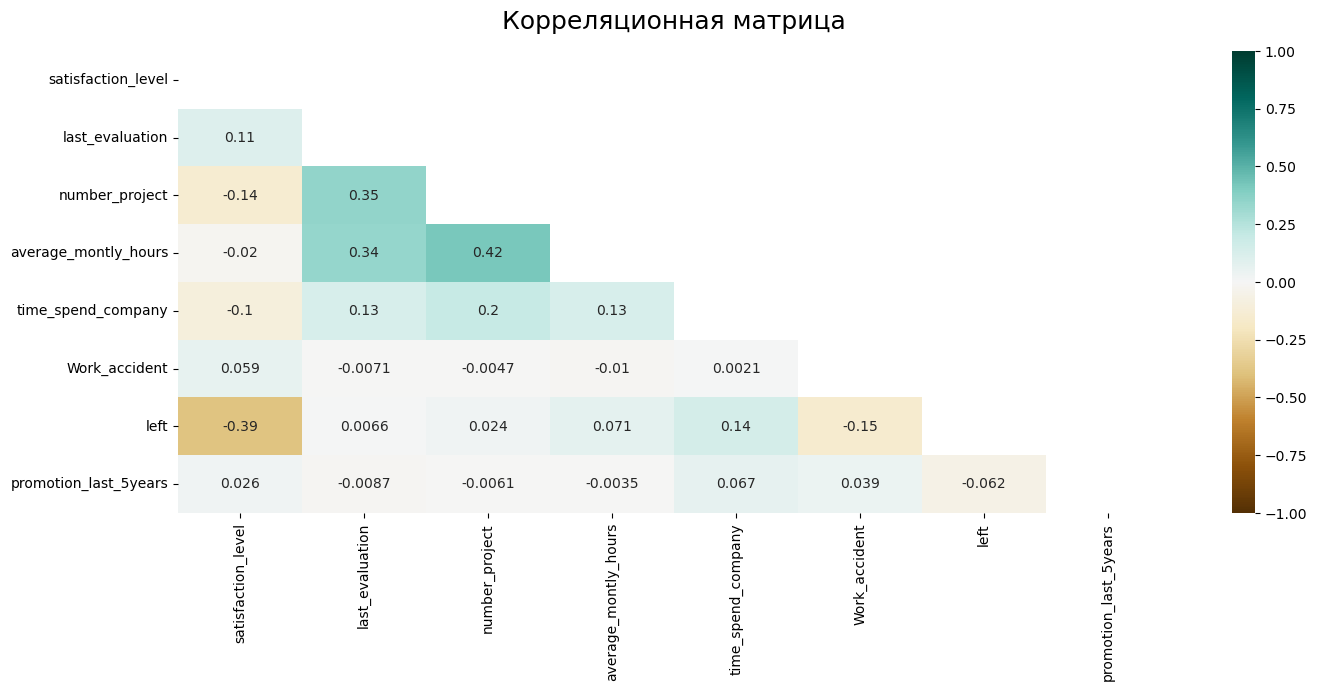

In [29]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(base.corr(), dtype=bool))
heatmap = sns.heatmap(base.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Корреляционная матрица', fontdict={'fontsize':18}, pad=16);

In [34]:
# Определение корреляционных значений (минимум/максимум)
pc=pd.DataFrame(np.tril(base.corr(), k=-1),columns=base.corr().columns,index=base.corr().columns)
pc=pc.idxmax()
cormax=base.corr().loc[pc.index,pc.values]
base_core=pd.DataFrame({'colname ': pc,'cor': np.diagonal(cormax)})
base_core.sort_values(by=['cor']).iloc[[0,-1]]

,colname,cor
left,satisfaction_level,-0.388375
number_project,average_montly_hours,0.417211


In [12]:
# Колличество сотрудников в каждом департаменте
base_diag = base.groupby('department').count()['satisfaction_level']
base_diag

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

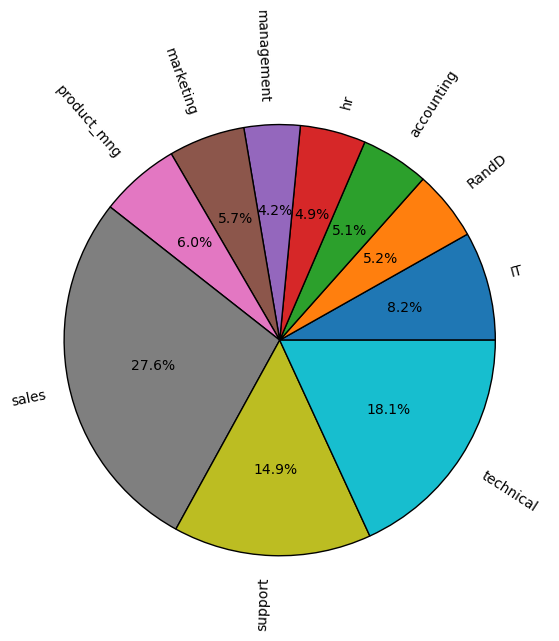

In [13]:
# Распределение сотрудников по департаментам
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pie(base_diag, labels=base_diag.index,autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"}, rotatelabels=True)
plt.title('')
plt.show()

Text(0.5, 1.0, 'Распределение зарплаты')

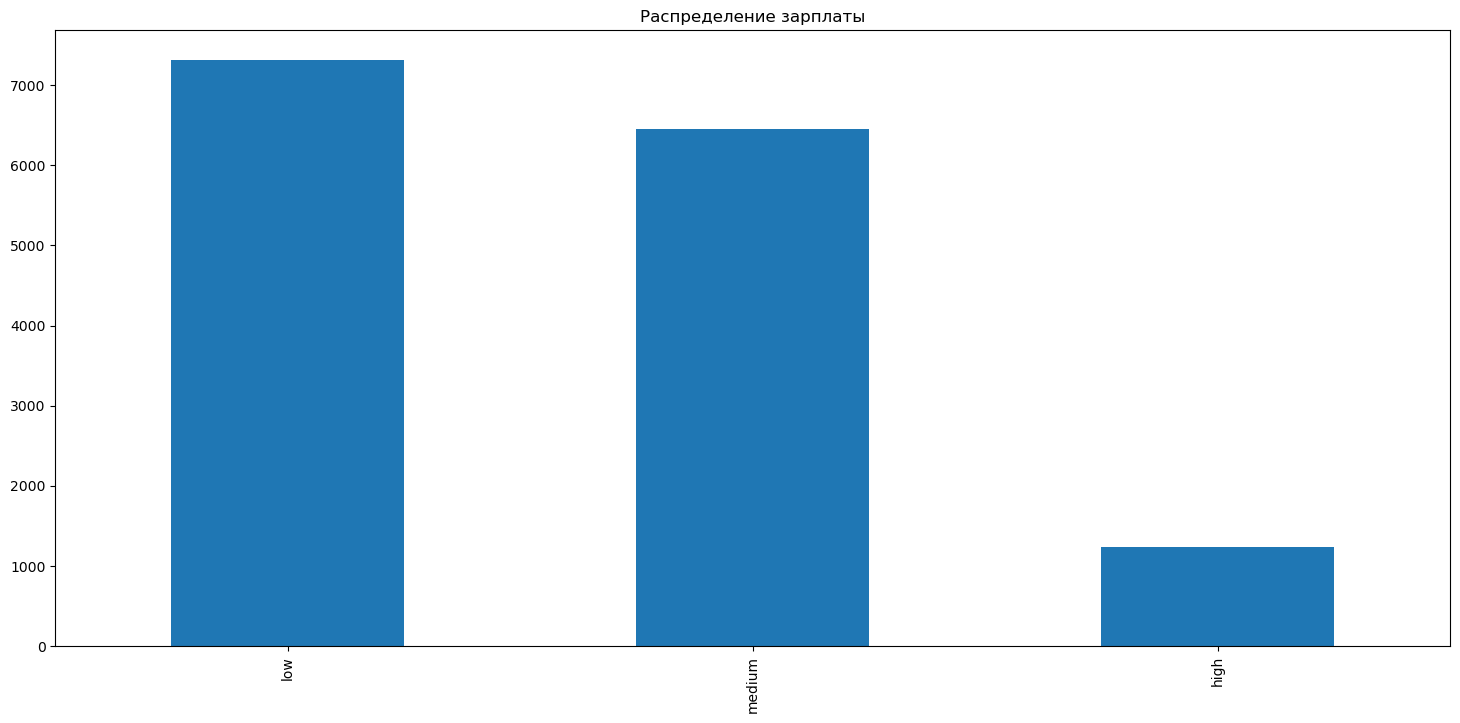

In [14]:
# Распределение сотрудников по зарплатам
base.salary.value_counts().plot(kind= 'bar', figsize=(18,8))
plt.title('Распределение зарплаты')

In [16]:
# Распределение зарплаты сотрудников по департаментам
base_dep_sal=base[['department','salary']].copy()
base_dep_sal['count']=[1]*len(base_dep_sal)
z=base_dep_sal[base_dep_sal.salary.isin(['low','medium','high'])].pivot_table(index='department', columns='salary', values='count', aggfunc=np.sum)
z

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<AxesSubplot:xlabel='department'>

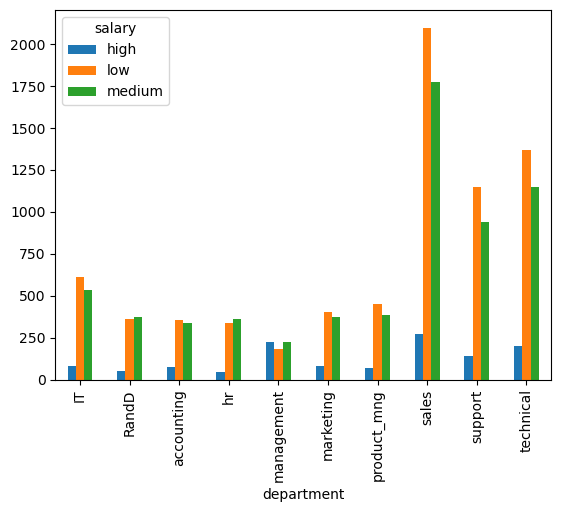

In [51]:
z.plot.bar()

In [53]:
# Попытка проверить гипотезу
b_theory=base[['average_montly_hours','salary']].copy()
b_theory['salary'] = np.where((b_theory.salary=='low'),1, np.where((b_theory.salary=='medium'),2, 3))
b_theory

,average_montly_hours,salary
0,157,1
1,262,2
2,272,2
3,223,1
4,159,1
...,...,...
14994,151,1
14995,160,1
14996,143,1
14997,280,1


In [54]:
b_theory.corr()

,average_montly_hours,salary
average_montly_hours,1.000000,-0.002242
salary,-0.002242,1.000000


In [50]:
# Показатели среди уволившихся и не уволившихся сотрудников
base_b=base[['satisfaction_level','number_project', 'left']].groupby('left').mean()
base_d=base[['promotion_last_5years', 'left']].copy()
base_d['percent']=base_d['promotion_last_5years']
base_d=base_d.groupby(['left', 'promotion_last_5years']).count()
base_d=base_d / base_d.groupby(level=0).sum()*100
base_d=base_d.iloc[[1,3]]
data_left=base_b.join(base_d)
data_left=data_left.rename(columns={'satisfaction_level':'satisfaction_level(mean)','number_project': 'number_project(mean)','percent': 'promotion_last_5years(%)'})
data_left.reset_index().drop(columns=['left','promotion_last_5years']).rename(index={0:"didn't quit",1:"quit"})


,satisfaction_level(mean),number_project(mean),promotion_last_5years(%)
didn't quit,0.666810,3.786664,2.625131
quit,0.440098,3.855503,0.532064
